The data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

Dataset source: Kaggle

Dataset attributes: 

Alcohol

Malic acid

Ash

Alcalinity of ash

Magnesium

Total phenols

Flavanoids

Nonflavanoid phenols

Proanthocyanins

Color intensity

Hue

OD280 of diluted wines

Proline

In [84]:
# Importing all the necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import umap.umap_ as umap

In [85]:
# loading dataset
wine = pd.read_csv('wine-clustering.csv')
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [86]:
#printing last 5 rows of the dataset
wine.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [87]:
# getting dimensions of the dataset
wine.shape

(178, 13)

In [88]:
# Getting additional info
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [89]:
# checking for null values
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [90]:
# checking for duplicate values
wine.duplicated().sum()

0

In [91]:
# getting statistical information
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [93]:
#scaling data so that mean=0 and standard deviation=1
ss = StandardScaler()
scaled = ss.fit_transform(wine)

# cfreating dataframe
df = pd.DataFrame(data = scaled, columns = wine.columns)
print(df.shape)
df.head()

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [46]:
# applying principal component analysis(PCA) for dimensionality reduction on scaled data
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(scaled)

# converting to dataframe
df_pca = pd.DataFrame(data = x_pca, columns = ['PC1','PC2'])
print(df_pca.shape)
df_pca.head()


(178, 2)


,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


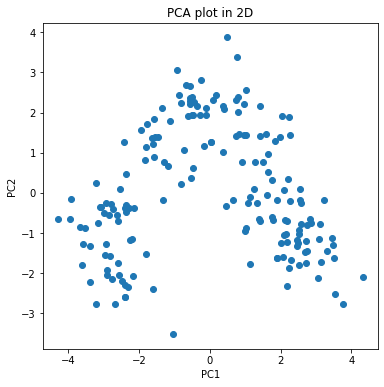

In [47]:
# plotting PCA in 2D
plt.figure(figsize = (6,6))
plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1])
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [48]:
# applying K-Means algorithm on data formed by applying PCA
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

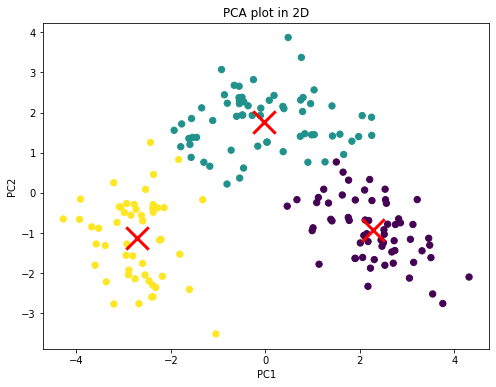

In [54]:
# plotting of clusters
plt.figure(figsize=(8,6))
plt.scatter(df_pca.iloc[:,0], df_pca.iloc[:,1], c=clusters, cmap="viridis", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="red")
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [95]:
# applying UMAP for dimensionality reduction on scaled data
import umap.umap_ as umap
um = umap.UMAP(n_components=2)
x_umap = um.fit_transform(scaled)

# converting to dataframe
df_umap = pd.DataFrame(data = x_umap, columns = ['UMAP1','UMAP2'])
print(df_umap.shape)
df_umap.head()

(178, 2)


,UMAP1,UMAP2
0,11.050231,8.113688
1,9.893476,8.359431
2,10.443300,9.575974
3,11.339363,9.469053
4,9.299207,9.875406


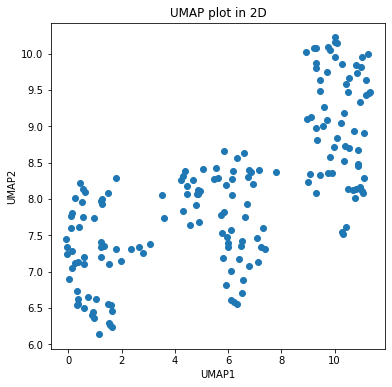

In [96]:
# Plotting UMAP data
plt.figure(figsize = (6,6))
plt.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1])
plt.title('UMAP plot in 2D')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [97]:
# applying K-Means algorithm on data formed by applying UMAP
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(scaled)
centroids = kmeans.cluster_centers_
centroids_umap = um.transform(centroids)

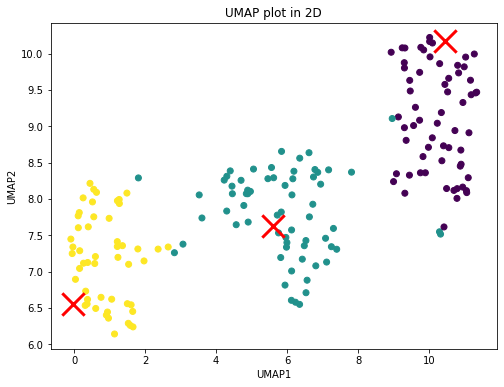

In [98]:
# plotting of clusters
plt.figure(figsize=(8,6))
plt.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1], c=clusters)
plt.scatter(x=centroids_umap[:,0], y=centroids_umap[:,1], marker="x",s=500, linewidths=3, color="red")
plt.title('UMAP plot in 2D')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

Result: It is obsderved that the K-Means clustering performs better on the data formed by UMAP.